# SMART101 Dataset EDA & Analysis
- Name: SMART(a Simple Multimodal Algorithmic Reasoning Task)
- Contents: 101 Unique Puzzles with Each puzzle to 2,000 new instances
- Puzzle Category (8): [Counting, logic, measure, spatial, arithmetic, algebra, pattern finding, path tracing]
- Split: [Puzzle Split(PS, 0-shot), Few-shot Split(FS), Instance Split(IS), Answer Split(AS)]
- Dir Tree: 
    - puzzle_type_info.csv
    - SMART_info_v2.csv
    - icon-classes.txt
    - SMART101-Data
        - [1 ~ 101] = pz_idx
            - img/puzzle_{pz_idx}\_e\_{ins_idx}.png   (ins_idx: {1~2000})
            - puzzle_{pz_idx}.csv: {ins_id, Query, Image, A, B, C, D, E, Answer}
    

In [1]:
# Library Call
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread

def viz_sample(pz_idx, ins_idx, puzzle_type_df):
    img_path = os.path.join(data_root, 'SMART101-Data', f'{pz_idx}', 'img', f'puzzle_{pz_idx}_e_{ins_idx}.png')
    annot_path = os.path.join(data_root, 'SMART101-Data', f'{pz_idx}', f'puzzle_{pz_idx}.csv')
    annot = pd.read_csv(annot_path)
    if annot['id'].dtype != 'int64':
        annot = pd.read_csv(annot_path).iloc[:,:9]
        annot.columns = ['Question', 'image', 'A', 'B', 'C', 'D', 'E', 'Answer', 'Note']
    ins_idx -= 1
    print(annot.loc[ins_idx]['Question'])
    print(annot.loc[ins_idx]['image'])
    print('A:',annot.loc[ins_idx]['A'], '   B:',annot.loc[ins_idx]['B'], '   C:',annot.loc[ins_idx]['C'], '   D:',annot.loc[ins_idx]['D'], '   E:',annot.loc[ins_idx]['E'])
    print('answer:', annot.loc[ins_idx]['Answer'])
    print('Note:', annot.loc[ins_idx]['Note'])
    print('Puzzle type:', puzzle_type_df.loc[pz_idx].values[0])
    plt.figure(figsize=(7,7))
    try:
        print('Img Path:',img_path)
        img = imread(img_path)
    except:
        img_path = os.path.join(data_root, 'SMART101-Data', f'{pz_idx}', 'img', f'puzzle_{pz_idx}_{ins_idx}.png')
        img = imread(img_path)
    plt.title(f'{pz_idx}th puzzle, {ins_idx+1}th instance')
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()

data_root = '/data/SMART101-release-v1'
pz_idx, ins_idx = 1, 1
print('Data Root Components:', data_root, os.listdir(data_root))
print(f'Sample: {pz_idx}th puzzle, {ins_idx}th instance')

Data Root Components: /data/SMART101-release-v1 ['SMART101-Data', 'puzzle_type_info.csv', 'inference_result', 'README.md']
Sample: 1th puzzle, 1th instance


In [2]:
puzzle_type_df = os.path.join(data_root, 'puzzle_type_info.csv')
puzzle_type_df = pd.read_csv(puzzle_type_df, index_col='puzzle_id')
print(puzzle_type_df.shape)
puzzle_type_df.head()

(101, 1)


,type
puzzle_id,
1,path
2,counting
3,counting
4,counting
5,counting


In [3]:
puzzle_type_df.loc[1]

type    path
Name: 1, dtype: object

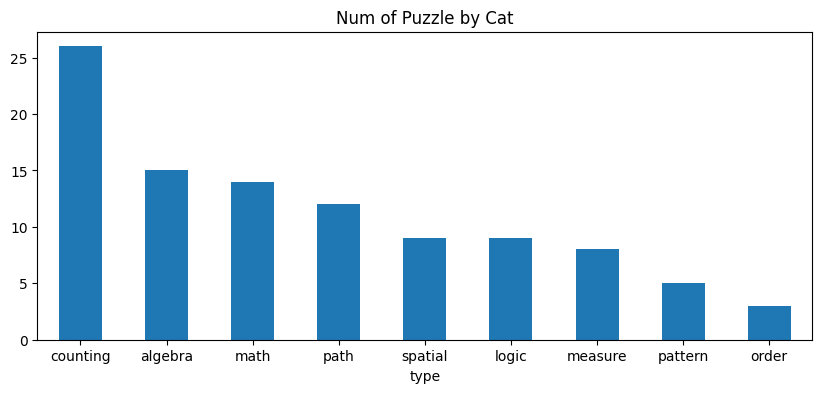

In [4]:
plt.figure(figsize=(10,4))
puzzle_type_df.type.value_counts().plot.bar()
plt.title('Num of Puzzle by Cat')
plt.xticks(rotation=0)
plt.show()

In [5]:
img_path = os.path.join(data_root, 'SMART101-Data', f'{pz_idx}', 'img', f'puzzle_{pz_idx}_e_{ins_idx}.png')
annot_path = os.path.join(data_root, 'SMART101-Data', f'{pz_idx}', f'puzzle_{pz_idx}.csv')
print('Img Path:',img_path)
print('Annot Path:',annot_path)

Img Path: /data/SMART101-release-v1/SMART101-Data/1/img/puzzle_1_e_1.png
Annot Path: /data/SMART101-release-v1/SMART101-Data/1/puzzle_1.csv


In [6]:
annot = pd.read_csv(annot_path)
print(annot.shape)
annot.head()

(2000, 10)


,id,Question,image,A,B,C,D,E,Answer,Note
0,1,Which object is linked to the hat?,puzzle_1_e_1.png,flower,disk,book,drink,ball,A,puzzle_1_e_1_note.png
1,2,What object is connected to the writing utensil?,puzzle_1_e_2.png,umbrella,bird,ball,blade,disk,B,puzzle_1_e_2_note.png
2,3,Which object is linked to the disk?,puzzle_1_e_3.png,hat,book,writing utensil,umbrella,ball,D,puzzle_1_e_3_note.png
3,4,What object is linked to the lock?,puzzle_1_e_4.png,medal,disk,envelope,blade,book,A,puzzle_1_e_4_note.png
4,5,What object is connected to the medal?,puzzle_1_e_5.png,bird,clock,umbrella,hat,drink,B,puzzle_1_e_5_note.png


The correct additions in the squares were performed according to the pattern shown in the table. What number is covered by the question mark?
puzzle_10_e_1.png
A: 18    B: 21    C: 17    D: 20    E: 14
answer: C
Note: nan
Puzzle type: algebra
Img Path: /data/SMART101-release-v1/SMART101-Data/10/img/puzzle_10_e_1.png


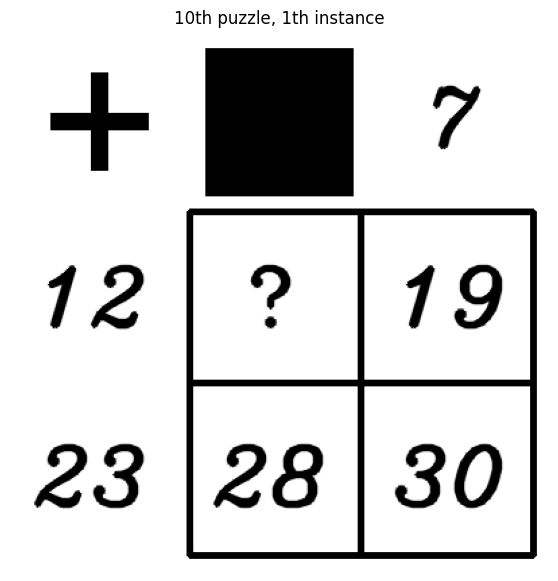

In [8]:
# {path: 1, counting: 2, math: 6, algebra: 7, spatial: 17, order: 18, measure: 20, logic: 40, pattern: 77}
# {Just Question: 30, Image with Text: 56}
viz_sample(pz_idx=10, ins_idx=1, puzzle_type_df=puzzle_type_df)

In [9]:
answer_history = {'A':0, 'B':0, "C":0, "D":0, "E":0}
for pz_idx in range(1,102):
    annot_path = os.path.join(data_root, 'SMART101-Data', f'{pz_idx}', f'puzzle_{pz_idx}.csv')
    annot = pd.read_csv(annot_path)
    if annot['id'].dtype != 'int64':
        annot = pd.read_csv(annot_path).iloc[:,:9]
        annot.columns = ['Question', 'image', 'A', 'B', 'C', 'D', 'E', 'Answer', 'Notes']
    answer_cnt = annot['Answer'].value_counts()
    for i in list(answer_history.keys()):
        answer_history[i] += answer_cnt[i]
print(answer_history)

{'A': 40377, 'B': 40420, 'C': 40589, 'D': 39897, 'E': 40717}


Whole of Answer: 202000


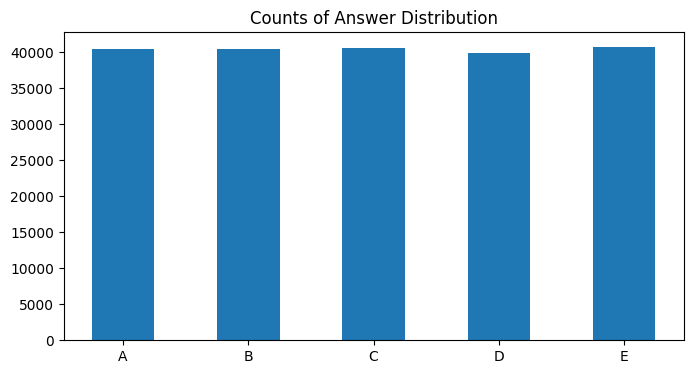

In [10]:
print('Whole of Answer:', sum(answer_history.values()))
plt.figure(figsize=(8,4))
plt.bar(answer_history.keys(), answer_history.values(), width=0.5)
plt.title('Counts of Answer Distribution')
plt.show()

In [11]:
smart_info = os.path.join(data_root, 'SMART_info_v2.csv')
smart_info = pd.read_csv(smart_info, index_col='id')
print(smart_info.shape)
smart_info.head()

(101, 13)


,Question,image,A,B,C,D,E,Answer option,difficulty,type,level,source,note: difficulty (1/2/3: easy/normal/hard)
id,,,,,,,,,,,,,
1,Who caught the fish?,mk2017_1.png,Adam,Basil,Charlie,David,Edgar,D,2,path,1,kangaroo/2017,8/26/2022 ready for review
2,"In the picture, there are stars with 5 points,...",mk2017_2.png,2,3,4,5,9,C,1,counting,1,kangaroo/2017,8/12/2022 revision ready for review; sugestion...
3,The entire pie seen in the picture is divided ...,mk2017_3.png,3,4,5,6,8,B,1,counting,1,kangaroo/2017,8/12/2022 ready for review; suggestions: chang...
4,Into how many parts do the scissors cut the ro...,mk2017_4.png,5,6,7,8,9,A,2,counting,1,kangaroo/2017,9/2/2022 ready for review; Same as 97 (but cou...
5,How many bricks are missing from the igloo?,mk2017_6.png,6,7,8,9,10,A,2,counting,1,kangaroo/2017,8/12/2022 ready for review


In [12]:
icon_path = os.path.join(data_root, 'icon-classes.txt')
icon_file = open(icon_path, 'r')
icon_label = []
while True:
    line = icon_file.readline()
    if not line: break
    icon_label.append(line.strip())
icon_file.close()
print(f'Whole of {len(icon_label)} icon_label')
print(icon_label[:4])

Whole of 51 icon_label
['airplane', 'arrow_directions', 'ball', 'biking']
